In [188]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

import nltk.corpus as corpus
import tokenize
from nltk.corpus import brown
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [189]:
train_data  = pd.read_csv('C://Users//hp//Desktop//python2//Tweet_Text//train.csv')
test_data = pd.read_csv('C://Users//hp//Desktop//python2//Tweet_Text//test.csv')

In [190]:
train_data.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [191]:
len(train_data)

7274

### Check for missing values

In [192]:
train_data.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

### A quick look at the sentiment column:

In [193]:
train_data['sentiment'].unique()

array([1, 2, 0, 3], dtype=int64)

In [194]:
train_data['sentiment'].value_counts()

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

In [195]:
# REMOVE NaN VALUES AND EMPTY STRINGS:
train_data.dropna(inplace=True)

blanks = []  # start with an empty list

for twt in train_data.itertuples():  # iterate over the DataFrame
    if type(twt)==str:            # avoid NaN values
        if twt.isspace():         # test 'tweet' for whitespace
            blanks.append(i)     # add matching index numbers to the list
train_data.drop(blanks, inplace=True)

### 0: Negative
### 1: Neutral
### 2: Positive 
### 3: Can't Tell

### Visualize the data:

In [196]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [197]:
# remove twitter handles (@user)
train_data['tidy_tweet'] = np.vectorize(remove_pattern)(train_data['tweet'], "@[\w]*")

In [198]:
train_data.head()

,tweet_id,tweet,sentiment,tidy_tweet
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,#sxswnui #sxsw #apple defining language of tou...
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles! All doodles should...
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in-your-face ex. of stealing t...
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone #SXSW app would b pretty awesome i...
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...


In [199]:
sid = SentimentIntensityAnalyzer()
train_data['sentiment_compound_polarity']=train_data.tweet.apply(lambda x:sid.polarity_scores(x)['compound'])
train_data['sentiment_POSITIVE']=train_data.tweet.apply(lambda x:sid.polarity_scores(x)['pos'])
train_data['sentiment_NEUTRAL']=train_data.tweet.apply(lambda x:sid.polarity_scores(x)['neu'])
train_data['sentiment_NEGATIVE']=train_data.tweet.apply(lambda x:sid.polarity_scores(x)['neg'])
#train_data['sentiment_cantsay']=train_data.tweet.apply(lambda x:sid.polarity_scores(x)['cs'])

#train_data['sentiment_CANTSAY']=train_data.tweet.apply(lambda x:sid.polarity_scores(x)['cantsay'])
train_data['sentiment_type']=''
train_data.loc[train_data.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
train_data.loc[train_data.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
train_data.loc[train_data.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
#train_data.loc[train_data.sentiment_compound_polarity==3,'sentiment_type']='CANTSAY'
train_data.head()

,tweet_id,tweet,sentiment,tidy_tweet,sentiment_compound_polarity,sentiment_POSITIVE,sentiment_NEUTRAL,sentiment_NEGATIVE,sentiment_type
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,#sxswnui #sxsw #apple defining language of tou...,0.0000,0.000,1.000,0.00,NEUTRAL
1,1851,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodles! All doodles should...,0.7840,0.330,0.670,0.00,POSITIVE
2,2689,one of the most in-your-face ex. of stealing t...,2,one of the most in-your-face ex. of stealing t...,-0.5719,0.000,0.850,0.15,NEGATIVE
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone #SXSW app would b pretty awesome i...,0.8611,0.389,0.611,0.00,POSITIVE
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...,0.0000,0.000,1.000,0.00,NEUTRAL


In [200]:
data = train_data['sentiment']

### Tokenization

In [203]:
train_data["tidy_tweet"] = np.vectorize(remove_pattern)(train_data["tweet"], "@[\w]*")

In [204]:
train_data['tidy_tweet'] = train_data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [205]:
train_data.head()

,tweet_id,tweet,sentiment,tidy_tweet,sentiment_compound_polarity,sentiment_POSITIVE,sentiment_NEUTRAL,sentiment_NEGATIVE,sentiment_type
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,#sxswnui #sxsw #apple defining language touch ...,0.0000,0.000,1.000,0.00,NEUTRAL
1,1851,Learning ab Google doodles! All doodles should...,1,"Learning Google doodles! doodles should light,...",0.7840,0.330,0.670,0.00,POSITIVE
2,2689,one of the most in-your-face ex. of stealing t...,2,most in-your-face stealing show &quot;At #SXSW...,-0.5719,0.000,0.850,0.15,NEGATIVE
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone #SXSW would pretty awesome didn't ...,0.8611,0.389,0.611,0.00,POSITIVE
4,3604,Line outside the Apple store in Austin waiting...,1,Line outside Apple store Austin waiting iPad #...,0.0000,0.000,1.000,0.00,NEUTRAL


In [206]:
train_data['tidy_tweet'] = train_data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [207]:
tokenized_tweet = train_data['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#sxswnui, #sxsw, #apple, defining, language, ...
1    [Learning, Google, doodles!, doodles, should, ...
2    [most, in-your-face, stealing, show, &quot;At,...
3    [This, iPhone, #SXSW, would, pretty, awesome, ...
4    [Line, outside, Apple, store, Austin, waiting,...
Name: tidy_tweet, dtype: object

### Stemming

In [208]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [#sxswnui, #sxsw, #appl, defin, languag, touch...
1    [learn, googl, doodles!, doodl, should, light,...
2    [most, in-your-fac, steal, show, &quot;at, #sx...
3    [thi, iphon, #sxsw, would, pretti, awesom, did...
4    [line, outsid, appl, store, austin, wait, ipad...
Name: tidy_tweet, dtype: object

### Visualization


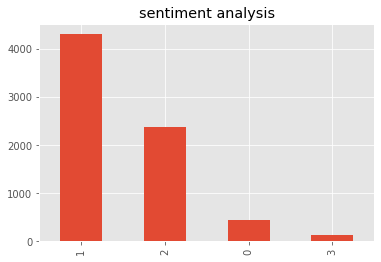

In [209]:
train_data.sentiment.value_counts().plot(kind='bar',title="sentiment analysis")

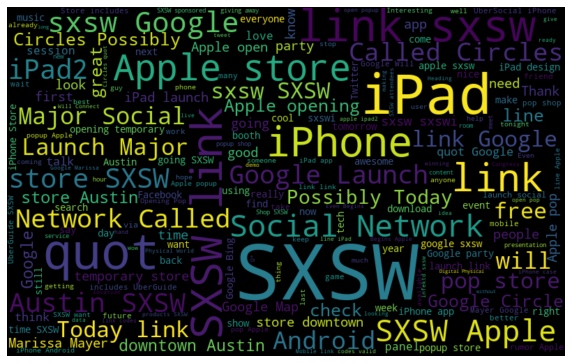

In [210]:
all_words = ' '.join([text for text in train_data['tidy_tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

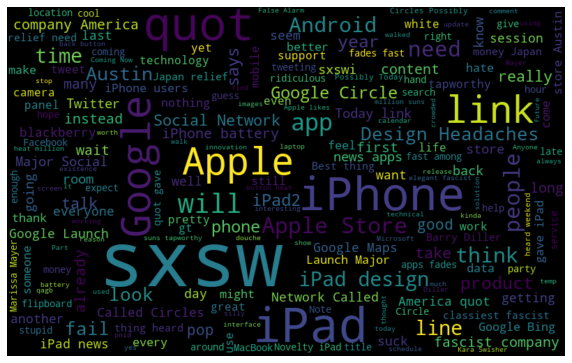

In [211]:
neg_words =' '.join([text for text in train_data['tidy_tweet'][train_data['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

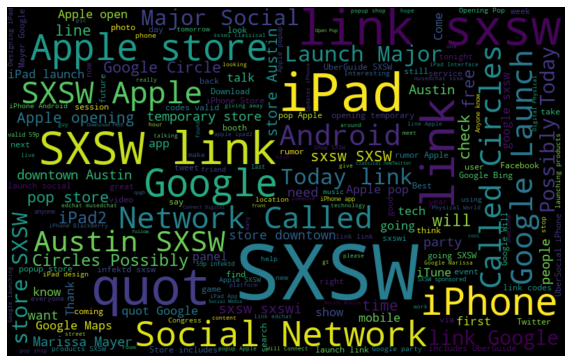

In [212]:
neu_words = ' '.join([text for text in train_data['tidy_tweet'][train_data['sentiment'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(neu_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

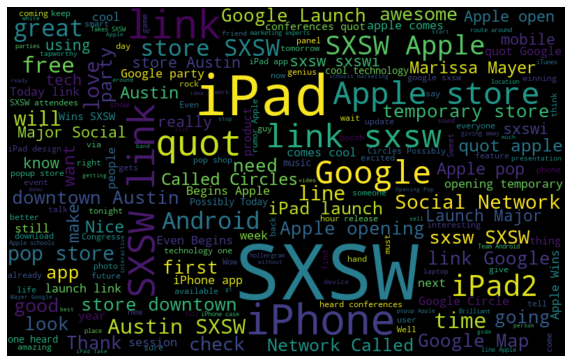

In [213]:
pos_words = ' '.join([text for text in train_data['tidy_tweet'][train_data['sentiment'] == 2]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [214]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [215]:
# extracting hashtags from non racist/sexist tweets

HT_negative = hashtag_extract(train_data['tidy_tweet'][train_data['sentiment'] == 0])

# extracting hashtags from racist/sexist tweets
HT_neutral = hashtag_extract(train_data['tidy_tweet'][train_data['sentiment'] == 1])
HT_positive = hashtag_extract(train_data['tidy_tweet'][train_data['sentiment'] == 2])
HT_cantsay = hashtag_extract(train_data['tidy_tweet'][train_data['sentiment'] == 3])
# unnesting list
HT_negative = sum(HT_negative,[])
HT_neutral = sum(HT_neutral,[])
HT_positive = sum(HT_positive,[])
HT_cantsay = sum(HT_cantsay,[])

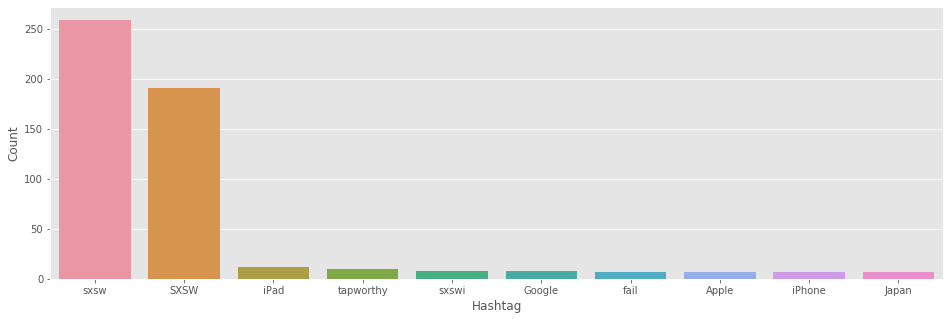

In [216]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

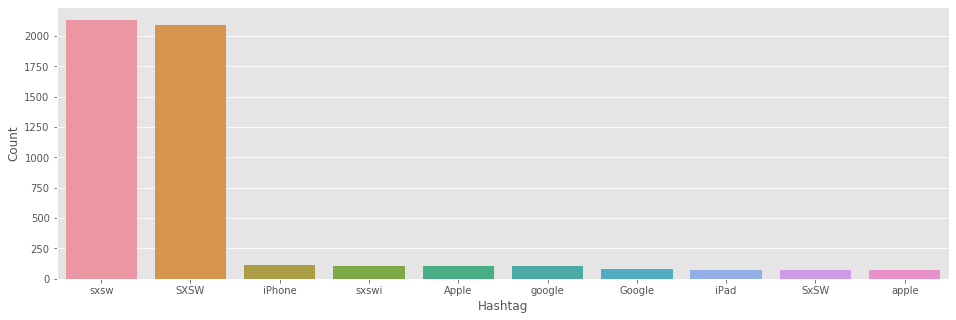

In [217]:
b = nltk.FreqDist(HT_neutral)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

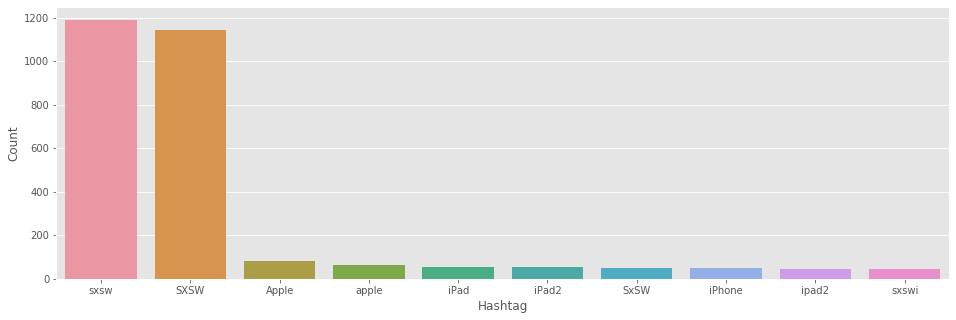

In [218]:
b = nltk.FreqDist(HT_positive)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

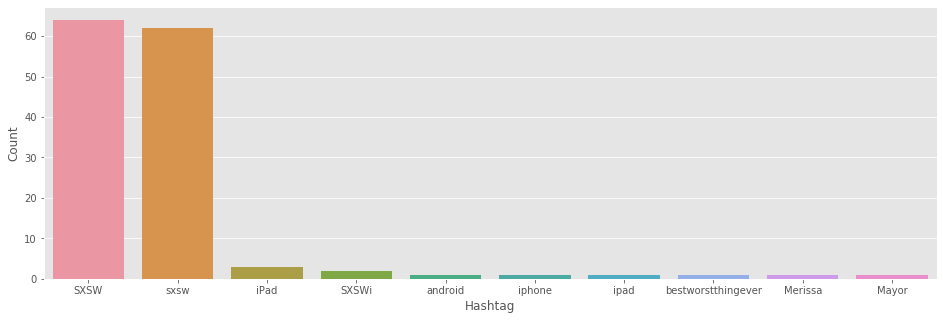

In [219]:
b = nltk.FreqDist(HT_cantsay)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [220]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data['tidy_tweet'], train_data['sentiment'], test_size=0.5, stratify=train_data['sentiment'])

trainne=train_data[train_data.sentiment==0]
trainneu=train_data[train_data.sentiment==1]
trainp=train_data[train_data.sentiment==2]
trainc=train_data[train_data.sentiment==3]
print(trainne.info())
print(trainneu.info())
print(trainp.info())
print(trainc.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 3 to 7256
Data columns (total 9 columns):
tweet_id                       456 non-null int64
tweet                          456 non-null object
sentiment                      456 non-null int64
tidy_tweet                     456 non-null object
sentiment_compound_polarity    456 non-null float64
sentiment_POSITIVE             456 non-null float64
sentiment_NEUTRAL              456 non-null float64
sentiment_NEGATIVE             456 non-null float64
sentiment_type                 456 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 35.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4310 entries, 0 to 7273
Data columns (total 9 columns):
tweet_id                       4310 non-null int64
tweet                          4310 non-null object
sentiment                      4310 non-null int64
tidy_tweet                     4310 non-null object
sentiment_compound_polarity    4310 non-null float64
s

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
y = train_data.sentiment.values

In [223]:
xtrain, xvalid, ytrain, yvalid = train_test_split(train_data.tidy_tweet.values, y, 
                                                   test_size=0.3 ,random_state=42)

In [224]:
xtrain, xvalid, ytrain, yvalid = train_test_split(train_data.tidy_tweet.values, y, 
                                                   test_size=0.3 ,random_state=42)

## Naive Bayes(Baseline)

In [225]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [226]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [227]:
text_nb = Pipeline([('tfidf', TfidfVectorizer()),('MNB', MultinomialNB() )])

In [228]:
text_nb.fit(xtrain, ytrain)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('MNB',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [229]:
prediction_nb = text_nb.predict(xvalid)

In [230]:
print(confusion_matrix(yvalid, prediction_nb))

[[   1  122   15    0]
 [   1 1249   51    0]
 [   0  542  164    0]
 [   0   34    3    0]]


In [231]:
print(accuracy_score(yvalid, prediction_nb))

0.6480293308890925


### Logistic Regression(Baseline)

In [232]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [234]:
text_lf = Pipeline([('tfidf', TfidfVectorizer()),('lf', LogisticRegression() )])

In [235]:
text_lf.fit(xtrain, ytrain)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

In [236]:
prediction_lf = text_lf.predict(xvalid)

In [237]:
print(confusion_matrix(yvalid, prediction_lf))

[[   4  107   27    0]
 [   1 1187  113    0]
 [   0  420  286    0]
 [   0   31    6    0]]


In [238]:
print(classification_report(yvalid, prediction_lf))

              precision    recall  f1-score   support

           0       0.80      0.03      0.06       138
           1       0.68      0.91      0.78      1301
           2       0.66      0.41      0.50       706
           3       0.00      0.00      0.00        37

    accuracy                           0.68      2182
   macro avg       0.54      0.34      0.33      2182
weighted avg       0.67      0.68      0.63      2182



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [239]:
print(accuracy_score(yvalid, prediction_lf))

0.6769019248395967


### LinearSVC(Baseline model)

In [240]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [241]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC() )])

In [242]:
text_clf.fit(xtrain, ytrain)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [243]:
predictions = text_clf.predict(xvalid)

In [244]:
print(confusion_matrix(yvalid, predictions))

[[  34   75   28    1]
 [  22 1069  207    3]
 [   3  317  385    1]
 [   2   22   12    1]]


In [245]:
print(classification_report(yvalid, predictions))

              precision    recall  f1-score   support

           0       0.56      0.25      0.34       138
           1       0.72      0.82      0.77      1301
           2       0.61      0.55      0.58       706
           3       0.17      0.03      0.05        37

    accuracy                           0.68      2182
   macro avg       0.51      0.41      0.43      2182
weighted avg       0.66      0.68      0.67      2182



In [246]:
print(accuracy_score(yvalid, predictions))

0.6824014665444547


In [247]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

ctv = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}',ngram_range=(1,3), stop_words='english')

ctv.fit(list(xtrain)+list(xvalid))
xtrain_ctv = ctv.transform(xtrain)
xvalid_ctv = ctv.transform(xvalid)

## Preprocessing on test data

In [248]:
 len(test_data)

1819

In [249]:
test_data.isnull().sum()

tweet_id    0
tweet       0
dtype: int64

In [250]:
# REMOVE NaN VALUES AND EMPTY STRINGS:
test_data.dropna(inplace=True)

blanks = []  # start with an empty list

for twt in test_data.itertuples():  # iterate over the DataFrame
    if type(twt)==str:            # avoid NaN values
        if twt.isspace():         # test 'tweet' for whitespace
            blanks.append(i)     # add matching index numbers to the list
test_data.drop(blanks, inplace=True)

In [251]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [252]:
# remove twitter handles (@user)
test_data['tidy_tweet'] = np.vectorize(remove_pattern)(test_data['tweet'], "@[\w]*")

In [253]:
sid = SentimentIntensityAnalyzer()
test_data['sentiment_compound_polarity']=test_data.tweet.apply(lambda x:sid.polarity_scores(x)['compound'])
test_data['sentiment_POSITIVE']=test_data.tweet.apply(lambda x:sid.polarity_scores(x)['pos'])
test_data['sentiment_NEUTRAL']=test_data.tweet.apply(lambda x:sid.polarity_scores(x)['neu'])
test_data['sentiment_NEGATIVE']=test_data.tweet.apply(lambda x:sid.polarity_scores(x)['neg'])
#train_data['sentiment_cantsay']=train_data.tweet.apply(lambda x:sid.polarity_scores(x)['cs'])

#train_data['sentiment_CANTSAY']=train_data.tweet.apply(lambda x:sid.polarity_scores(x)['cantsay'])
test_data['sentiment_type']=''
test_data.loc[test_data.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
test_data.loc[test_data.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
test_data.loc[test_data.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
#train_data.loc[train_data.sentiment_compound_polarity==3,'sentiment_type']='CANTSAY'
test_data.head()

,tweet_id,tweet,tidy_tweet,sentiment_compound_polarity,sentiment_POSITIVE,sentiment_NEUTRAL,sentiment_NEGATIVE,sentiment_type
0,7506,Audience Q: What prototyping tools do you use?...,Audience Q: What prototyping tools do you use?...,0.0000,0.000,1.000,0.0,NEUTRAL
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...,At SXSW? Send Your Best Photos &amp; Videos to...,0.6369,0.208,0.792,0.0,POSITIVE
2,247,@mention and here's a pic of you winning your...,and here's a pic of you winning your ipad! #...,0.5707,0.187,0.813,0.0,POSITIVE
3,7688,Google Marissa Mayer: mobile phone as a cursor...,Google Marissa Mayer: mobile phone as a cursor...,0.4144,0.121,0.879,0.0,POSITIVE
4,3294,#SXSW Google maps is even cooler than I thought,#SXSW Google maps is even cooler than I thought,0.0000,0.000,1.000,0.0,NEUTRAL


In [254]:
test_data['tidy_tweet'] = test_data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [255]:
test_data.head()

,tweet_id,tweet,tidy_tweet,sentiment_compound_polarity,sentiment_POSITIVE,sentiment_NEUTRAL,sentiment_NEGATIVE,sentiment_type
0,7506,Audience Q: What prototyping tools do you use?...,Audience What prototyping tools use? Sketchboo...,0.0000,0.000,1.000,0.0,NEUTRAL
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...,SXSW? Send Your Best Photos &amp; Videos to......,0.6369,0.208,0.792,0.0,POSITIVE
2,247,@mention and here's a pic of you winning your...,here's winning your ipad! #unsix #sxsw {link} ...,0.5707,0.187,0.813,0.0,POSITIVE
3,7688,Google Marissa Mayer: mobile phone as a cursor...,Google Marissa Mayer: mobile phone cursor phys...,0.4144,0.121,0.879,0.0,POSITIVE
4,3294,#SXSW Google maps is even cooler than I thought,#SXSW Google maps even cooler than thought,0.0000,0.000,1.000,0.0,NEUTRAL


### stemming

In [256]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [#sxswnui, #sxsw, #appl, defin, languag, touch...
1    [learn, googl, doodles!, doodl, should, light,...
2    [most, in-your-fac, steal, show, &quot;at, #sx...
3    [thi, iphon, #sxsw, would, pretti, awesom, did...
4    [line, outsid, appl, store, austin, wait, ipad...
Name: tidy_tweet, dtype: object

### linear SVC

In [257]:

svc = LinearSVC()
svc.fit(xtrain_ctv, ytrain)
predict = svc.predict(xvalid_ctv)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [258]:
test_data.head()

,tweet_id,tweet,tidy_tweet,sentiment_compound_polarity,sentiment_POSITIVE,sentiment_NEUTRAL,sentiment_NEGATIVE,sentiment_type
0,7506,Audience Q: What prototyping tools do you use?...,Audience What prototyping tools use? Sketchboo...,0.0000,0.000,1.000,0.0,NEUTRAL
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...,SXSW? Send Your Best Photos &amp; Videos to......,0.6369,0.208,0.792,0.0,POSITIVE
2,247,@mention and here's a pic of you winning your...,here's winning your ipad! #unsix #sxsw {link} ...,0.5707,0.187,0.813,0.0,POSITIVE
3,7688,Google Marissa Mayer: mobile phone as a cursor...,Google Marissa Mayer: mobile phone cursor phys...,0.4144,0.121,0.879,0.0,POSITIVE
4,3294,#SXSW Google maps is even cooler than I thought,#SXSW Google maps even cooler than thought,0.0000,0.000,1.000,0.0,NEUTRAL


In [259]:
xtest_ctv = ctv.transform(test_data.tidy_tweet.values)
final_predict_svc = svc.predict(xtest_ctv)

In [260]:
from sklearn import metrics

print(metrics.classification_report(yvalid[0:728],final_predict_svc[0:728]))
print(metrics.confusion_matrix(yvalid[0:728],final_predict_svc[0:728]))

              precision    recall  f1-score   support

           0       0.14      0.05      0.07        40
           1       0.58      0.67      0.62       442
           2       0.29      0.25      0.27       236
           3       0.00      0.00      0.00        10

    accuracy                           0.49       728
   macro avg       0.25      0.24      0.24       728
weighted avg       0.46      0.49      0.47       728

[[  2  28  10   0]
 [  9 295 135   3]
 [  3 173  59   1]
 [  0   9   1   0]]


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20f0a661048>)

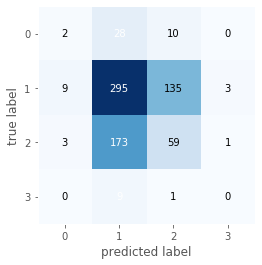

In [261]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(metrics.confusion_matrix(yvalid[0:728],final_predict_svc[0:728]))

In [262]:
accuracy = accuracy_score(yvalid[0:728],final_predict_svc[0:728])
accuracy

0.489010989010989

In [263]:
submission = pd.DataFrame({"tweet_id":test_data['tweet_id'], "sentiment":final_predict_svc})
filename = 'submission_file1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission_file1.csv


### Logistic Regression with test data

In [264]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [265]:
from sklearn.linear_model import LogisticRegression

#lf = LogisticRegression(C=1.0)
lf = LogisticRegression(solver = 'lbfgs')
lf.fit(xtrain_ctv, ytrain)
predict = lf.predict_proba(xvalid_ctv)

print ("logloss: %0.3f " % multiclass_logloss(yvalid, predict))


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


logloss: 0.782 


In [266]:
xtest_ctv = ctv.transform(test_data.tidy_tweet.values)
final_predict1 = lf.predict(xtest_ctv)

In [267]:
final_predict1[:10]

array([1, 1, 1, 2, 1, 1, 2, 1, 1, 1], dtype=int64)

In [268]:
from sklearn import metrics

print(metrics.classification_report(yvalid[0:728],final_predict1[0:728]))
print(metrics.confusion_matrix(yvalid[0:728],final_predict1[0:728]))

              precision    recall  f1-score   support

           0       0.15      0.05      0.08        40
           1       0.58      0.69      0.63       442
           2       0.28      0.22      0.25       236
           3       0.00      0.00      0.00        10

    accuracy                           0.50       728
   macro avg       0.26      0.24      0.24       728
weighted avg       0.45      0.50      0.47       728

[[  2  31   7   0]
 [  8 306 126   2]
 [  3 179  53   1]
 [  0   9   1   0]]


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20f04a3f788>)

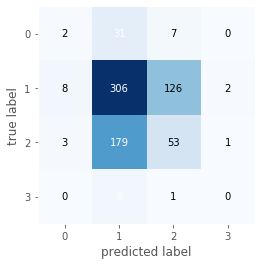

In [269]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(metrics.confusion_matrix(yvalid[0:728],final_predict1[0:728]))

In [270]:
accuracy = accuracy_score(yvalid[0:728],final_predict1[0:728])
accuracy

0.4958791208791209

In [271]:
submission = pd.DataFrame({"tweet_id":test_data['tweet_id'], "sentiment":final_predict1})
filename = 'submission_file2.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission_file2.csv


## sentiment analysis using naive bayes

In [272]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [273]:
model = MultinomialNB()
model.fit(xtrain_ctv, ytrain)
predict = model.predict_proba(xvalid_ctv)

print ("logloss: %0.3f " % multiclass_logloss(yvalid, predict))

logloss: 2.489 


In [274]:
xtest_nb = ctv.transform(test_data.tidy_tweet.values)
final_predict_nb = model.predict(xtest_nb)

In [275]:
from sklearn import metrics

print(metrics.classification_report(yvalid[0:728],final_predict_nb[0:728]))
print(metrics.confusion_matrix(yvalid[0:728],final_predict_nb[0:728]))

              precision    recall  f1-score   support

           0       0.14      0.05      0.07        40
           1       0.61      0.74      0.67       442
           2       0.32      0.23      0.27       236
           3       0.00      0.00      0.00        10

    accuracy                           0.53       728
   macro avg       0.27      0.26      0.25       728
weighted avg       0.48      0.53      0.50       728

[[  2  27  11   0]
 [  9 329 104   0]
 [  3 178  55   0]
 [  0   8   2   0]]


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [276]:
accuracy = accuracy_score(yvalid[0:728],final_predict_nb[0:728])
accuracy

0.5302197802197802

In [277]:
submission = pd.DataFrame({"tweet_id":test_data['tweet_id'], "sentiment":final_predict_nb})
filename = 'submission_file3.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission_file3.csv
